<a href="https://colab.research.google.com/github/Ristoll/AIS_L4-6/blob/main/LR_4_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[5519 2360]
 [2832 5047]]
TP: 5047
FN: 2832
FP: 2360
TN: 5519
[[5519 2360]
 [2832 5047]]
True
True

Accuracy_score:
0.6705165630156111
Accuracy RF: 0.671
Accuracy LR: 0.616

Recall_score:
0.6405635232897576
0.6405635232897576

Precision_score:
0.681382476036182
0.681382476036182

F1_score:
0.660342797330891
0.6603427973308911
scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660

scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668


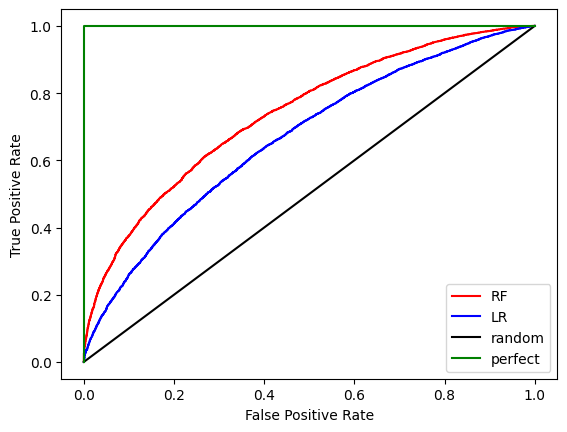

AUC RF:0.738
AUC LR:0.666


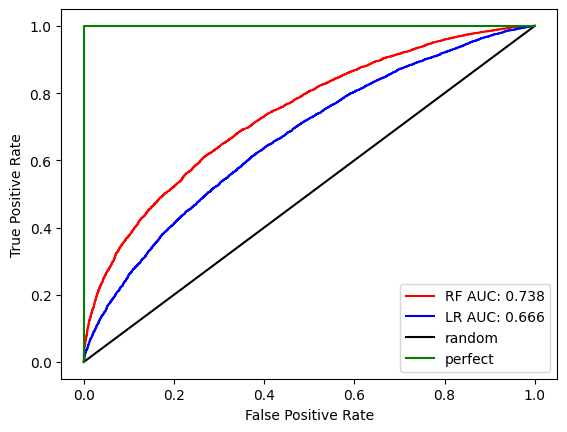

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_metrics.csv')
df.head()
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df.actual_label.values, df.predicted_RF.values))

def chamata_find_TP(y_true, y_pred):
  return sum((y_true == 1) & (y_pred == 1))
def chamata_find_FN(y_true, y_pred):
  return sum((y_true == 1) & (y_pred == 0))
def chamata_find_FP(y_true, y_pred):
  return sum((y_true == 0) & (y_pred == 1))
def chamata_find_TN(y_true, y_pred):
  return sum((y_true == 0) & (y_pred == 0))
print('TP:',chamata_find_TP(df.actual_label.values, df.predicted_RF.values))
print('FN:',chamata_find_FN(df.actual_label.values, df.predicted_RF.values))
print('FP:',chamata_find_FP(df.actual_label.values, df.predicted_RF.values))
print('TN:',chamata_find_TN(df.actual_label.values, df.predicted_RF.values))

def chamata_find_conf_matrix_values(y_true,y_pred):
   TP = chamata_find_TP(y_true,y_pred)
   FN = chamata_find_FN(y_true,y_pred)
   FP = chamata_find_FP(y_true,y_pred)
   TN = chamata_find_TN(y_true,y_pred)
   return TP,FN,FP,TN

def chamata_confusion_matrix(y_true, y_pred):
  TP,FN,FP,TN = chamata_find_conf_matrix_values(y_true,y_pred)
  return np.array([[TN,FP],[FN,TP]])

print(chamata_confusion_matrix(df.actual_label.values, df.predicted_RF.values))

print(np.array_equal(
    chamata_confusion_matrix(df.actual_label.values, df.predicted_RF.values),
    confusion_matrix(df.actual_label.values, df.predicted_RF.values))
)

print(np.array_equal(
    chamata_confusion_matrix(df.actual_label.values, df.predicted_LR.values),
    confusion_matrix(df.actual_label.values, df.predicted_LR.values))
)

from sklearn.metrics import accuracy_score
print("\nAccuracy_score:")
print(accuracy_score(df.actual_label.values, df.predicted_RF.values))

def chamata_accuracy_score(y_true, y_pred):
  TP,FN,FP,TN = chamata_find_conf_matrix_values(y_true,y_pred)
  return (TP + TN)/(TP+TN+FP+FN)

acc_rf = chamata_accuracy_score(df.actual_label.values, df.predicted_RF.values)
acc_lr = chamata_accuracy_score(df.actual_label.values, df.predicted_LR.values)

print('Accuracy RF: %.3f' % acc_rf)
print('Accuracy LR: %.3f' % acc_lr)

from sklearn.metrics import recall_score
print("\nRecall_score:")
print(recall_score(df.actual_label.values, df.predicted_RF.values))

def chamata_recall_score(y_true, y_pred):
  TP,FN,FP,TN = chamata_find_conf_matrix_values(y_true,y_pred)
  return TP/(TP+FN)

print(chamata_recall_score(df.actual_label.values, df.predicted_RF.values))

from sklearn.metrics import precision_score
print("\nPrecision_score:")
print(precision_score(df.actual_label.values, df.predicted_RF.values))

def chamata_precision_score(y_true, y_pred):
  TP,FN,FP,TN = chamata_find_conf_matrix_values(y_true,y_pred)
  return TP/(TP+FP)

print(chamata_precision_score(df.actual_label.values, df.predicted_RF.values))

from sklearn.metrics import f1_score
print("\nF1_score:")
print(f1_score(df.actual_label.values, df.predicted_RF.values))

def chamata_f1_score(y_true, y_pred):
  precision = chamata_precision_score(y_true, y_pred)
  recall = chamata_recall_score(y_true, y_pred)
  return 2/((1/precision)+(1/recall))

print(chamata_f1_score(df.actual_label.values, df.predicted_RF.values))

print('scores with threshold = 0.5')
print('Accuracy RF: %.3f'%(chamata_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall RF: %.3f'%(chamata_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision RF: %.3f'%(chamata_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 RF: %.3f'%(chamata_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('')
print('scores with threshold = 0.25')
print('Accuracy RF: %.3f'%(chamata_accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Recall RF: %.3f'%(chamata_recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Precision RF: %.3f'%(chamata_precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('F1 RF: %.3f'%(chamata_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))

from sklearn.metrics import roc_curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

from sklearn.metrics import roc_auc_score
auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_metrics.csv to data_metrics.csv
